In [53]:
import numpy as np
import matplotlib.pyplot as plt 
import lasio

las1=lasio.read(r"/Users/home/Downloads/IW1-ALL.las")
las2=lasio.read(r"/Users/home/Downloads/IW1-SONIC.las")

In [54]:
print(las1.sections['Curves'])

Mnemonic  Unit  Value  Description                                                       
--------  ----  -----  -----------                                                       
DEPT      M            DEPTH (BOREHOLE) {F10.4}                                          
AF10      OHMM         Array Induction Four Foot Resistivity A10 {F13.4}                 
AF20      OHMM         Array Induction Four Foot Resistivity A20 {F13.4}                 
AF30      OHMM         Array Induction Four Foot Resistivity A30 {F13.4}                 
AF60      OHMM         Array Induction Four Foot Resistivity A60 {F13.4}                 
AF90      OHMM         Array Induction Four Foot Resistivity A90 {F13.4}                 
ANOR      M/S2         Acceleration Computed Norm {F13.4}                                
AO10      OHMM         Array Induction One Foot Resistivity A10 {F13.4}                  
AO20      OHMM         Array Induction One Foot Resistivity A20 {F13.4}                  
AO30      

In [55]:
print(las2.sections['Curves'])

Mnemonic   Unit  Value  Description                                        
--------   ----  -----  -----------                                        
DEPT       M            DEPTH (BOREHOLE) {F10.4}                           
CDF        N            Calibrated Downhole Force {F13.4}                  
DTCO       US/F         Delta-T Compressional {F13.4}                      
DTCO3      US/F         Compressional Slowness from Measurement 3 {F13.4}  
DTSH5      US/F         Shear Slowness from Measurement 5 {F13.4}          
DTSH6      US/F         Shear Slowness from Measurement 6 {F13.4}          
DTSM       US/F         Delta-T Shear {F13.4}                              
HD1_PPC1   IN           PPC1 Hole Diameter 1 {F13.4}                       
HD2_PPC1   IN           PPC1 Hole Diameter 2 {F13.4}                       
SPHI       V/V          Sonic Porosity {F13.4}                             
TENS:1     LBF          Cable Tension {F13.4}                              
ANOR       M

In [90]:
well1=las1.df()
well2=las2.df()

In [93]:
well1=well1.reset_index()
well2=well2.reset_index()
# print(min(well1['DEPTH']))
# print(max(well1['DEPTH']))

In [101]:
'''creating a new dataframe for depth range(3950,4150) ; Upper Vulcan Formation'''

import pandas as pd
DEPTH,CALI=[],[]
GR,RHOB=[],[]
SPHI,RT=[],[]
DTCO,DTSM=[],[]
NPHI=[]
AT10=[]
AT90=[]

for i in range(len(well1.DEPT)):
    if well1.DEPT[i]>=3910 and well1.DEPT[i]<=4200:
        DEPTH.append(well1.DEPT[i])
        CALI.append(well1.CALI[i])
        GR.append(well2.GR[i])
        RHOB.append(well1.RHOB[i])
        SPHI.append(well2.SPHI[i])
        RT.append(well1.RT[i])
        DTCO.append(well2.DTCO[i])
        DTSM.append(well2.DTSM[i])
        AT10.append(well1.AT10[i])
        AT90.append(well1.AT90[i])
        
for i in range(len(well2.DEPT)):
    if well2.DEPT[i]>=3910 and well2.DEPT[i]<=4200:
        NPHI.append(well2.SPHI[i])

df=pd.DataFrame(zip(DEPTH,CALI,GR,RHOB,NPHI,SPHI,RT,DTCO,DTSM,AT10,AT90),columns=('DEPTH','CALI','GR','RHOB','NPHI','SPHI','RT','DTCO','DTSM','AT10','AT90'))   
print(df)

         DEPTH    CALI       GR    RHOB    NPHI    SPHI       RT     DTCO  \
0    4199.9916  8.7652   9.4478  2.4770  0.0976  0.1126  34.9786  68.3018   
1    4199.8392  8.7565   9.0553  2.4745  0.0997  0.1160  34.4636  68.7590   
2    4199.6868  8.7519   9.4013  2.4806  0.0995  0.1147  33.4658  68.5913   
3    4199.5344  8.7640   9.7089  2.4808  0.1009  0.1160  33.0860  68.7629   
4    4199.3820  8.7605  10.1574  2.4823  0.1016  0.1150  31.3859  68.6298   
..         ...     ...      ...     ...     ...     ...      ...      ...   
917  4060.2408  8.7012  27.5617  2.0619  0.0062  0.0538   3.0331  61.2708   
918  4060.0884  8.7026  27.7765  2.0748  0.0062  0.0555   3.0331  61.4545   
919  4059.9360  8.7263  27.0685  2.0889  0.0062  0.0564   3.0331  61.5584   
920  4059.7836  8.7238  34.2577  2.0716  0.0062  0.0722   3.0331  63.3099   
921  4059.6312  8.7339  45.9568  2.0728  0.0062  0.0748   3.0331  63.6187   

         DTSM     AT10     AT90  
0    107.5413  32.2541  34.9786  
1    10

In [42]:
import pandas as pd
CALI=well1[['DEPT','CALI']]
GR=well2[['DEPT','GR']]
RHOB=well1[['DEPT','RHOB']]
SPHI=well2[['DEPT','SPHI']]
RT=well1[['DEPT','RT']]
DTCO=well2[['DEPT','DTCO']]
DTSM=well2[['DEPT','DTSM']]
NPHI=well1[['DEPT','DPHI']]
AT10=well1[['DEPT','AT10']]
AT90=well1[['DEPT','AT90']]
CALI=CALI.loc[(CALI['DEPT']>=4133.7) & (CALI['DEPT']<=4239.7)]
GR=GR.loc[(GR['DEPT']>=4133.7) & (GR['DEPT']<=4239.7)]
RHOB=RHOB.loc[(RHOB['DEPT']>=4133.7) & (RHOB['DEPT']<=4239.7)]
SPHI=SPHI.loc[(SPHI['DEPT']>=4133.7) & (SPHI['DEPT']<=4239.7)]
RT=RT.loc[(RT['DEPT']>=4133.7) & (RT['DEPT']<=4239.7)]
DTCO=DTCO.loc[(DTCO['DEPT']>=4133.7) & (DTCO['DEPT']<=4239.7)]
DTSM=DTSM.loc[(DTSM['DEPT']>=4133.7) & (DTSM['DEPT']<=4239.7)]
NPHI=NPHI.loc[(NPHI['DEPT']>=4133.7) & (NPHI['DEPT']<=4239.7)]
AT10=AT10.loc[(AT10['DEPT']>=4133.7) & (AT10['DEPT']<=4239.7)]
AT90=AT90.loc[(AT90['DEPT']>=4133.7) & (AT90['DEPT']<=4239.7)]
df=pd.DataFrame(zip(DEPTH,CALI,GR,RHOB,NPHI,SPHI,RT,DTCO,DTSM,AT10,AT90),columns=('DEPTH','CALI','GR','RHOB','DPHI','SPHI','RT','DTCO','DTSM','AT10','AT90'))   
df

,DEPTH,CALI,GR,RHOB,DPHI,SPHI,RT,DTCO,DTSM,AT10,AT90


## Q. No. 3

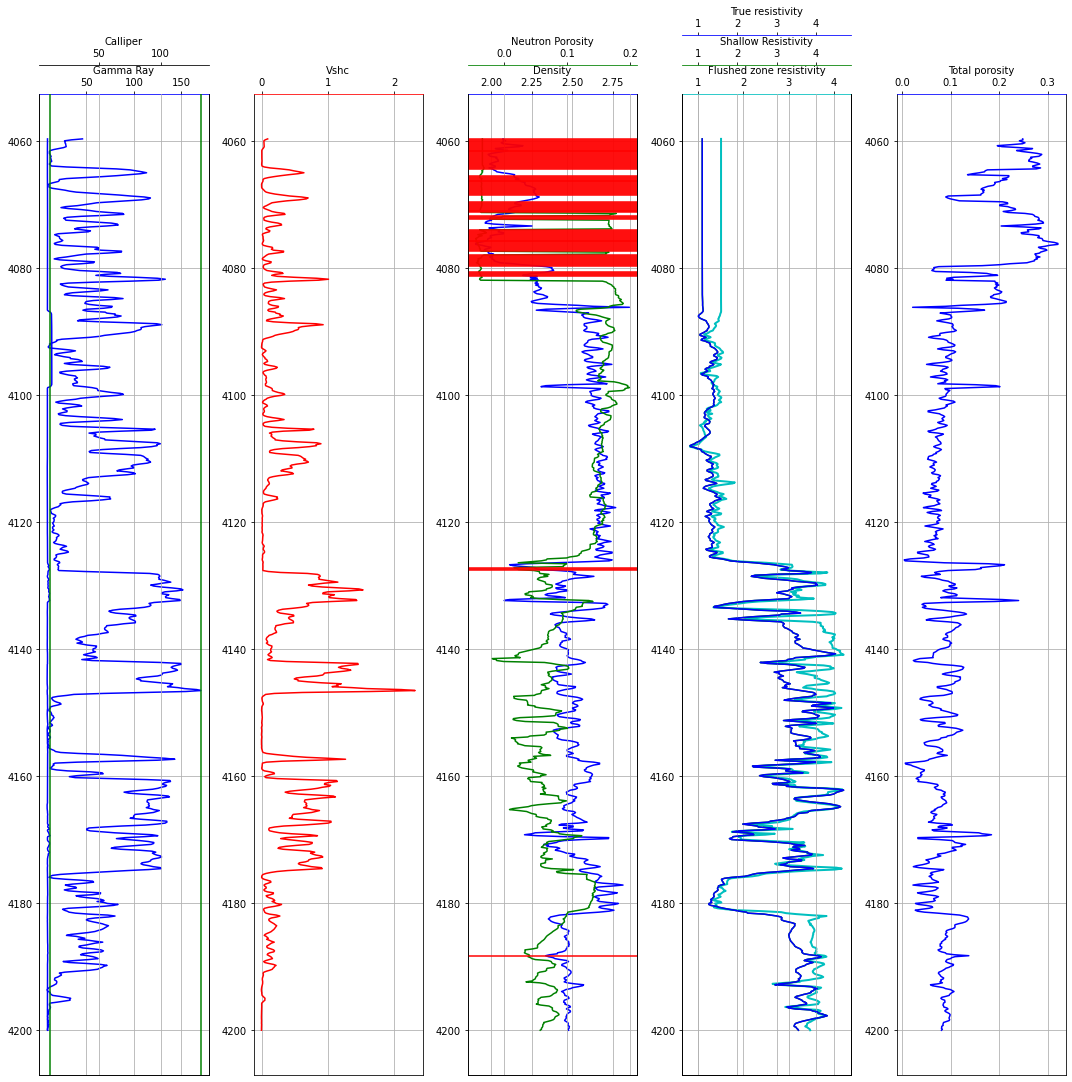

In [105]:
'''Neutron porosity(NPHI) correction'''
NPHI=df['NPHI']-0.04       #Sandstone correction factor
'''Density porosity(DPHI) calculation'''
Psa=2.65    # density of sandstones
Pshc=2.7    # density of shale
Pfl=1       #fluid density
DPHI=(Psa-df['RHOB'])/(Psa-Pfl)

'''volume of shale (Vshc) calculation'''
# Age of rock= Early Cretaceous
p05=df.GR.quantile(0.05)
p95=df.GR.quantile(0.95)
Igr=(df['GR']-p05)/(p95-p05)    # gamma ray index
Vshc = 0.083*(2**(3.7*Igr)-1)   # Vshc calculation for young tertiary rocks

'''Total Porosity calculation'''
TPHI1=((df['NPHI']**2+DPHI**2)/2)**0.5   #for gas bearing formations
TPHI2=(df['NPHI']+DPHI)/2                #for oil, water bearing formations
TPHI=[]
DEPT=[]

#Correcting TPHI for gas regions by considering rms of NPHI and DPHI ,else the average only
for i in range(len(df['DEPTH'])):
    if ((df['GR'][i] <= 90) and (df['RHOB'][i] <=1.9)) or ((NPHI[i] <= 0.08) and  (DPHI[i] >= 0.19) and (df['RHOB'][i] <=1.9)) or ((NPHI[i] <= 0.08) and  (DPHI[i] >= 0.19) and (df['GR'][i] <= 90)):
        TPHI.append(((NPHI[i]**2+DPHI[i]**2)/2)**0.5 )
        DEPT.append(1)
    else:
        TPHI.append((NPHI[i]+DPHI[i])/2)
        DEPT.append(0)      
        
   
'''Plot'''
fig,axes=plt.subplots(figsize=(15,15))
#set up plot axes
ax1=plt.subplot2grid((1,5) , (0,0) ,rowspan=1 , colspan=1)
ax11=ax1.twiny()
ax2=plt.subplot2grid((1,5) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,5) , (0,2) ,rowspan=1, colspan=1)
ax31=ax3.twiny()
ax4=plt.subplot2grid((1,5) , (0,3) ,rowspan=1 , colspan=1)
ax41=ax4.twiny()
ax42=ax4.twiny()
ax5=plt.subplot2grid((1,5) , (0,4) ,rowspan=1 , colspan=1)

#set up indvidual log tracks/ subplots
ax1.plot(df['GR'],df['DEPTH'], color='b', lw=1.5)
ax1.invert_yaxis()
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Gamma Ray')
ax1.xaxis.set_label_position('top')
ax1.grid()

ax11.plot(df['CALI'],df['DEPTH'], color='b', lw=1.5)
ax11.axvline(p05,color='g',label='p05')
ax11.axvline(p95,color='g',label='p95')
ax11.spines['top'].set_position(("axes", 1.03))
ax11.xaxis.set_ticks_position('top')
ax11.set_xlabel('Calliper')
ax11.xaxis.set_label_position('top')
ax11.grid()
       
ax2.plot(Vshc,df['DEPTH'], color='r', lw=1.5)
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('r')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Vshc')
ax2.xaxis.set_label_position('top')
ax2.grid()

ax3.plot(df['RHOB'], df['DEPTH'], color='b', lw=1.5)
ax3.invert_yaxis()
ax3.spines['top'].set_edgecolor('b')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Density')
ax3.xaxis.set_label_position('top')
ax3.grid()

ax31.plot(NPHI,df['DEPTH'], color='g', lw=1.5)
ax31.spines['top'].set_edgecolor('g')
ax31.spines['top'].set_position(("axes", 1.03))
ax31.set_xlabel('Neutron Porosity')
ax31.xaxis.set_label_position('top')
ax31.grid()
for i in range(len(df['DEPTH'])):                    #Marking the depth with possible gas-rich zones
    if DEPT[i]==1:
        ax31.axhline(y=df['DEPTH'][i],color='r',label='Gas Line')

        
    
    
ax4.plot(np.log(df['AT10']),df['DEPTH'], color='c', lw=2)
ax4.invert_yaxis()
ax4.spines['top'].set_edgecolor('c')
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Flushed zone resistivity')
ax4.xaxis.set_label_position('top')
ax4.grid()

ax41.plot(np.log(df['AT90']),df['DEPTH'], color='g', lw=1.5)
ax41.invert_yaxis()
ax41.spines['top'].set_edgecolor('g')
ax41.spines['top'].set_position(("axes", 1.03))
ax41.set_xlabel('Shallow Resistivity')
ax41.xaxis.set_label_position('top')

ax42.plot(np.log(df['RT']),df['DEPTH'], color='b', lw=1.5)
ax42.invert_yaxis()
ax42.spines['top'].set_edgecolor('b')
ax42.spines['top'].set_position(("axes", 1.06))
ax42.set_xlabel('True resistivity')
ax42.xaxis.set_label_position('top')
ax42.grid()

ax5.plot(TPHI,df['DEPTH'], color='b', lw=1.5)
ax5.invert_yaxis()
ax5.spines['top'].set_edgecolor('b')
ax5.xaxis.set_ticks_position('top')
ax5.set_xlabel('Total porosity')
ax5.xaxis.set_label_position('top')
ax5.grid(2)

plt.tight_layout()


## Q. No. 4

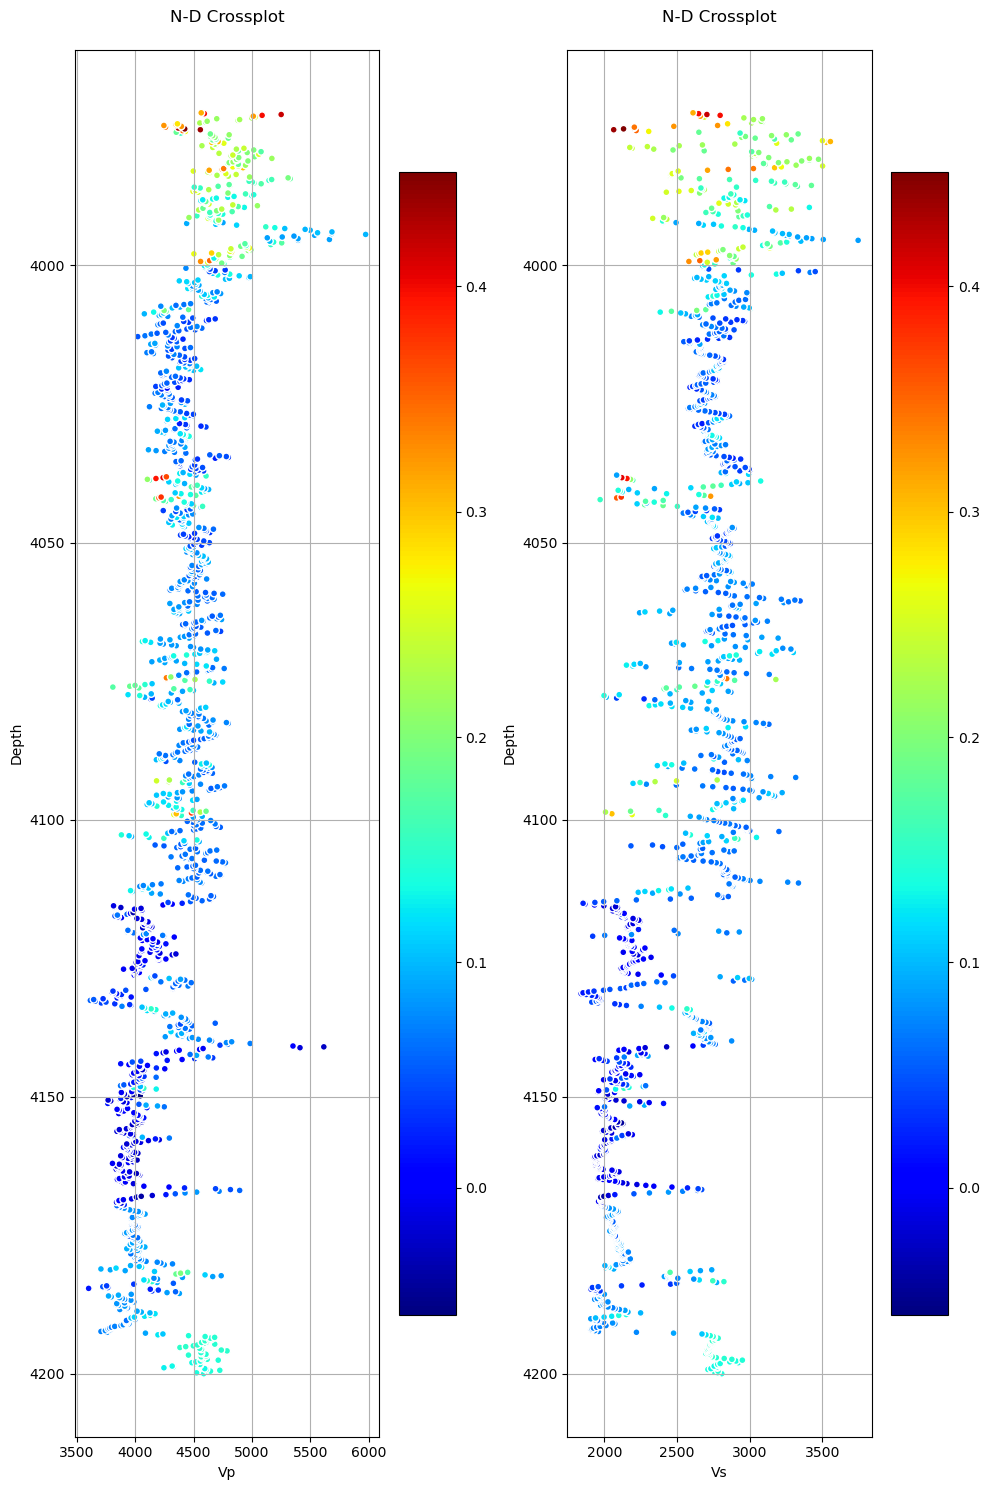

In [ ]:
# N-D cross-plot generation; where color represent variation of GR value
Vp=304800/df['DTCO']      # P-Wave Velocity
Vs=304800/df['DTSM']      #S-Wave Velocity
plt.figure(figsize=(10,15))

a=min(TPHI)
b=max(TPHI)
c=Vshc.min()
d=Vshc.max()

plt.subplot(1,2,1)
plt.scatter(Vp,df.DEPTH, c = TPHI, marker='o', s=25, edgecolors='w', cmap='jet', vmin=a, vmax=b)
plt.xlabel('Vp'); plt.ylabel('Depth'); plt.gca().invert_yaxis() ;plt.grid(True)
plt.colorbar(); plt.title('N-D Crossplot', pad=20); 

plt.subplot(1,2,2)
plt.scatter(Vs,df.DEPTH, c = TPHI, marker='o', s=25, edgecolors='w', cmap='jet', vmin=a, vmax=b)
plt.xlabel('Vs'); plt.ylabel('Depth'); plt.gca().invert_yaxis(); plt.grid(True)
plt.colorbar(); plt.title('N-D Crossplot', pad=20); 

plt.tight_layout()

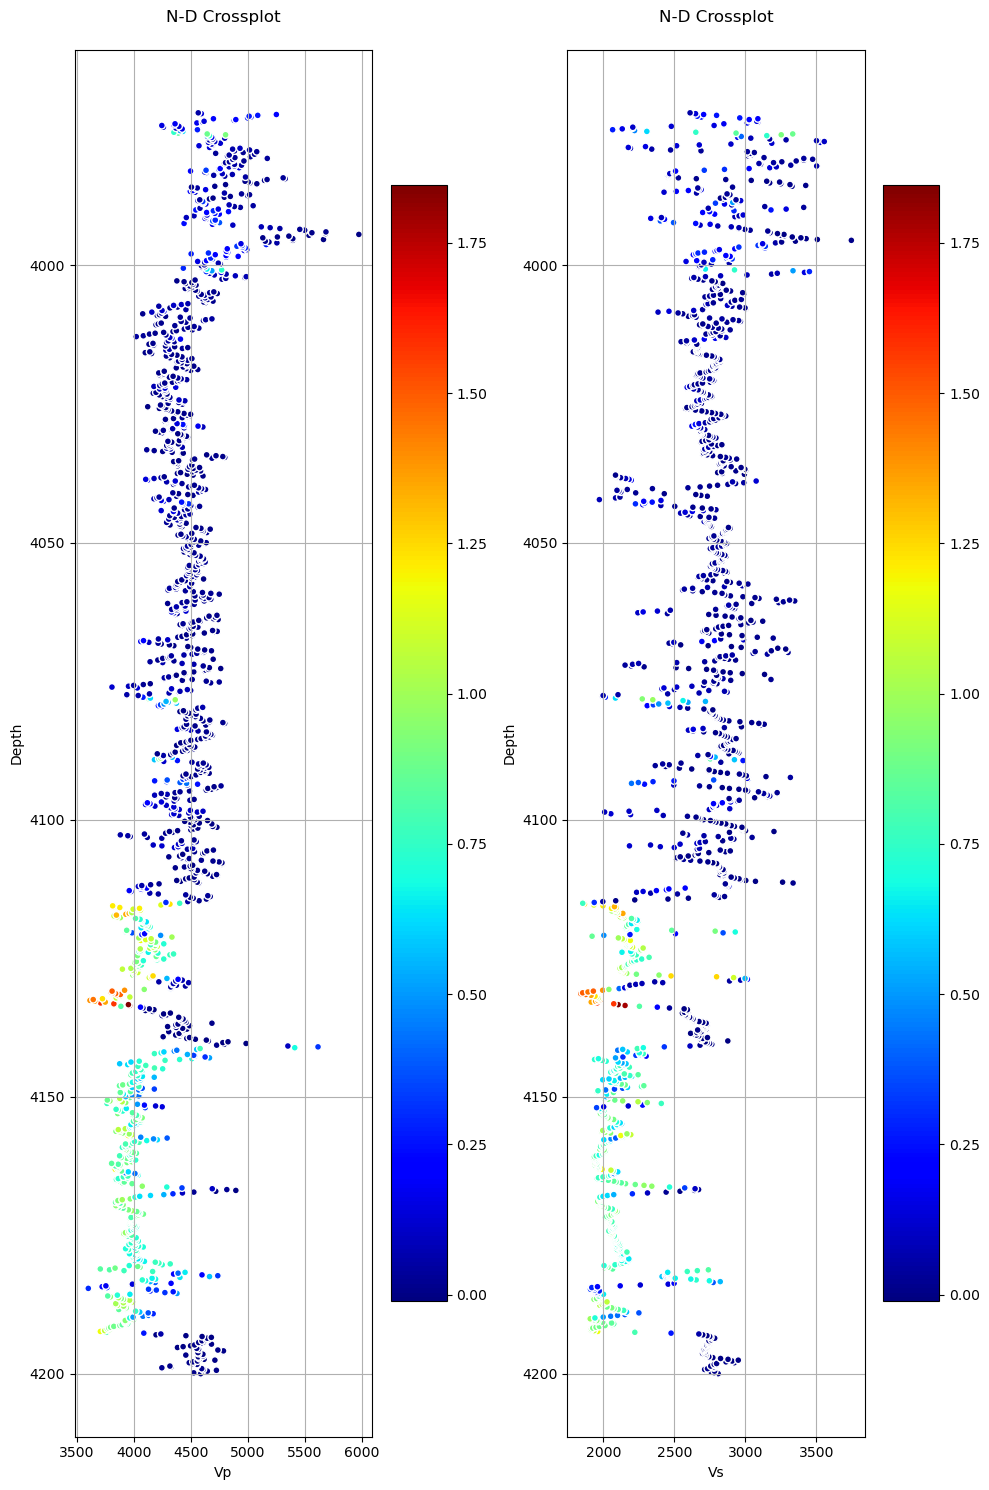

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(1,2,1)
plt.scatter(Vp,df.DEPTH, c = Vshc, marker='o', s=25, edgecolors='w', cmap='jet', vmin=c, vmax=d)
plt.xlabel('Vp'); plt.ylabel('Depth'); plt.gca().invert_yaxis(); plt.grid(True)
plt.colorbar(); plt.title('N-D Crossplot', pad=20); 

plt.subplot(1,2,2)
plt.scatter(Vs,df.DEPTH, c = Vshc, marker='o', s=25, edgecolors='w', cmap='jet', vmin=c, vmax=d)
plt.xlabel('Vs'); plt.ylabel('Depth'); plt.gca().invert_yaxis(); plt.grid(True)
plt.colorbar(); plt.title('N-D Crossplot', pad=20); 

plt.tight_layout()

## Q. No. 5

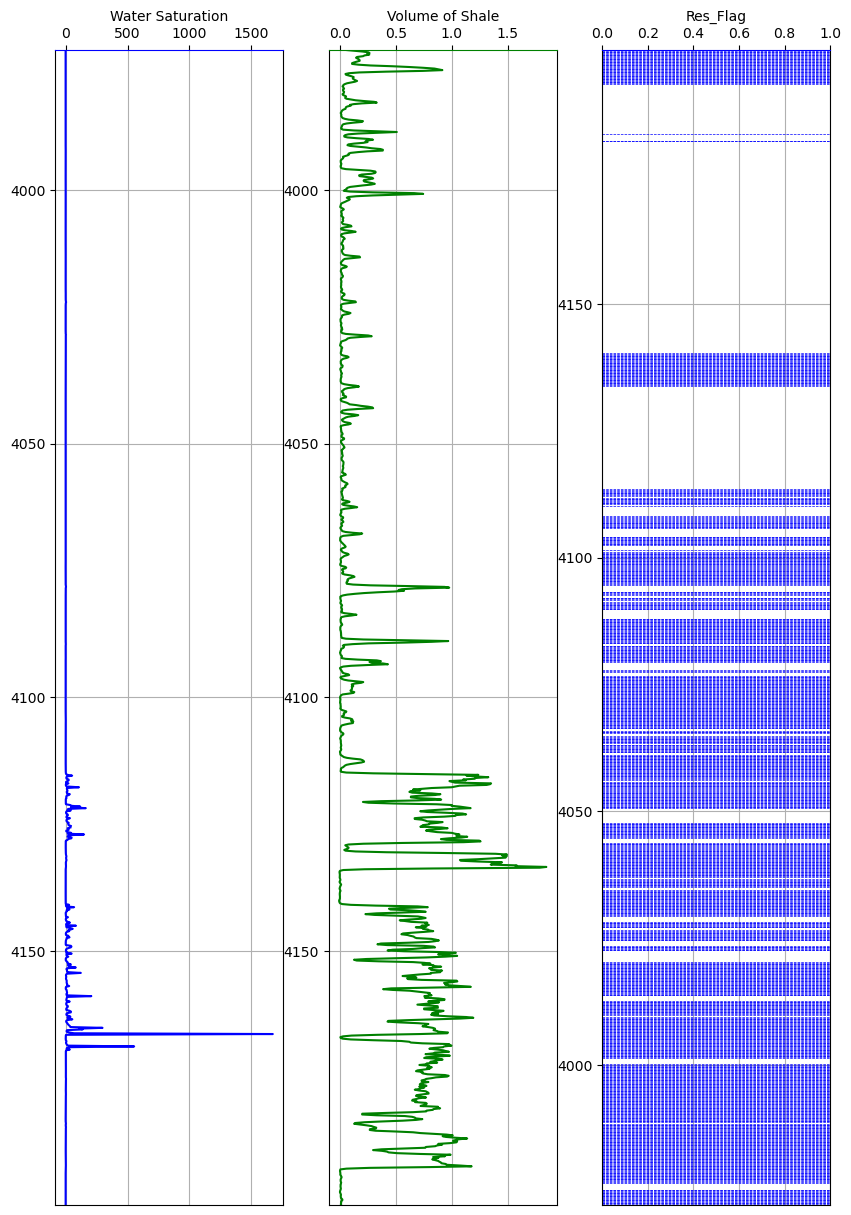

In [ ]:
a=1
m=2
n=2
Rw=0.1
Res_Flag=[]
dff=pd.DataFrame(zip(TPHI))
dff.rename(columns={0:'TPHI'},inplace=True) 

'''Water Saturation calculation'''

Sw=(a*Rw/(df['RT']*dff['TPHI']**m))**(1/n)  #Archie's Formula of Water Saturation

# Reservoir Characterization
for i in range(len(df['DEPTH'])):
    if Vshc[i] <= 0.4 and Sw[i] <= 0.7:
        Res_Flag.append(1)
    else:
        Res_Flag.append(0)
        
plt.figure(figsize=(10,15))        
#set up plot axes
ax1=plt.subplot2grid((1,3) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,3) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,3) , (0,2) ,rowspan=1, colspan=1)
    
#set up indvidual log tracks/ subplots
ax1.plot(Sw,df['DEPTH'], color='b', lw=1.5)
ax1.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax1.invert_yaxis()
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Water Saturation')
ax1.xaxis.set_label_position('top')
ax1.grid()

ax2.plot(Vshc,df['DEPTH'], color='g', lw=1.5)
ax2.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('g')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Volume of Shale')
ax2.xaxis.set_label_position('top')
ax2.grid()

for i in range(len(Res_Flag)):
    if Res_Flag[i]==1:
        ax3.axhline(y=df['DEPTH'][i],color='b',label='Res_Flag',lw=0.5,ls='--')
        ax3.invert_yaxis()
        ax3.spines['top'].set_edgecolor('b')
        ax3.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
        ax3.xaxis.set_ticks_position('top')
        ax3.set_xlabel('Res_Flag')
        ax3.xaxis.set_label_position('top')
        ax3.grid()


## Q. No. 6

,Vshc,Sw,TPHI
count,1494.000000,1494.000000,1494.000000
mean,0.282527,inf,0.085978
std,0.378627,NaN,0.071618
min,-0.010822,0.076951,-0.056333
25%,0.010174,0.398655,0.048996
50%,0.050562,0.607955,0.074576
75%,0.634092,1.710478,0.110231
max,1.845672,inf,0.450788


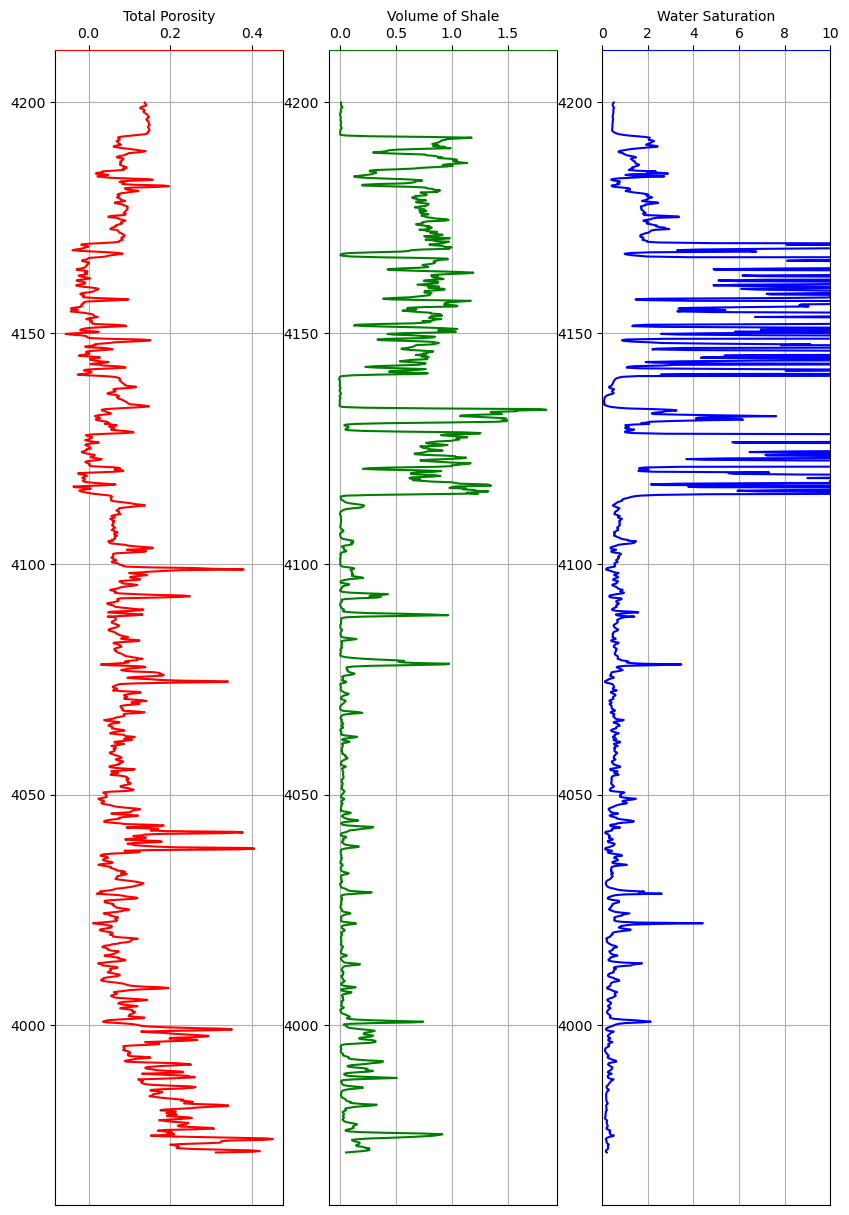

In [ ]:
plt.figure(figsize=(10,15))        
#set up plot axes
ax1=plt.subplot2grid((1,3) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,3) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,3) , (0,2) ,rowspan=1, colspan=1)
    
#set up indvidual log tracks/ subplots
ax1.plot(TPHI,df['DEPTH'], color='r', lw=1.5)
ax1.spines['top'].set_edgecolor('r')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Total Porosity')
ax1.xaxis.set_label_position('top')
ax1.grid()

ax2.plot(Vshc,df['DEPTH'], color='g', lw=1.5)
ax2.spines['top'].set_edgecolor('g')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Volume of Shale')
ax2.xaxis.set_label_position('top')
ax2.grid()

ax3.plot(Sw,df['DEPTH'], color='b', lw=1.5)
ax3.set_xlim(0,10)
ax3.spines['top'].set_edgecolor('b')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Water Saturation')
ax3.xaxis.set_label_position('top')
ax3.grid()

df1=pd.DataFrame(zip(Vshc,Sw,TPHI), columns=('Vshc', 'Sw', 'TPHI'))
df1.describe()
